In [1]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

import sys
sys.path.append("../../src")
sys.path.append("../lorenz")
import os
import numpy as np
import pickle
from example_thomas import simulate_thomas, get_thomas_data, generate_thomas_data
from example_lorenz import simulate_lorenz, get_lorenz_data, generate_lorenz_data

from autoencoder import full_network
from training import create_feed_dictionary
from sindy_utils import sindy_simulate

# compatibility issues
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import tensorflow as tf


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


# Testing the simulate_thomas() function


We first plot the thomas' attractor and then the lorenz' one.

[1.32654991 1.83676348 2.60230868]


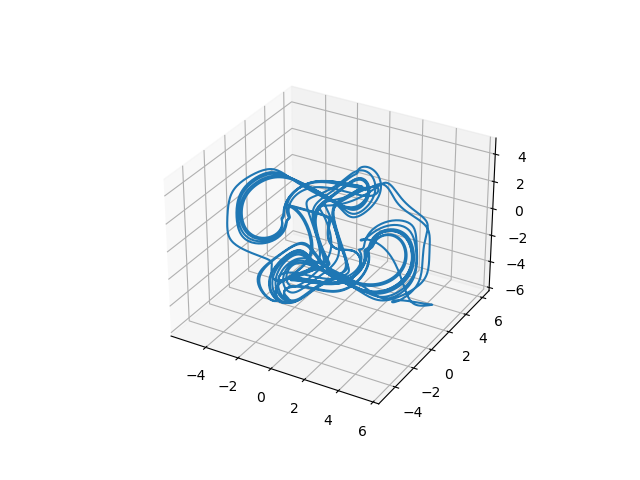

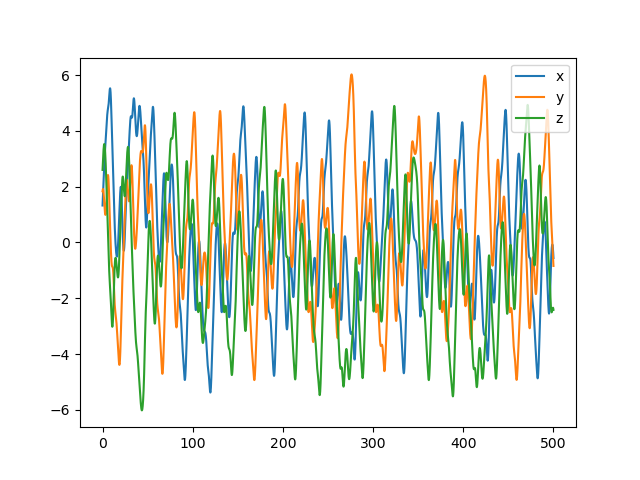

In [2]:
%matplotlib widget

t = np.linspace(0, 500, 5000)

x0 = np.random.uniform(-3, 3, size=(1, 3))[0]
print(x0)

sim_1 = simulate_thomas(x0, t, b = 0.1)

z, dz, ddz = sim_1


fig = plt.figure()
ax = plt.axes(projection='3d')


xdata = z[:,0]
ydata = z[:,1]
zdata = z[:,2]


ax.plot3D(xdata, ydata, zdata)
#fig.show()

fig2 = plt.figure()

plt.plot(t, xdata, label = "x")
plt.plot(t, ydata, label = "y")
plt.plot(t, zdata, label = "z")
plt.legend()
#fig2.show()
#


[ 2.05991364 -2.83082475  0.95869553]


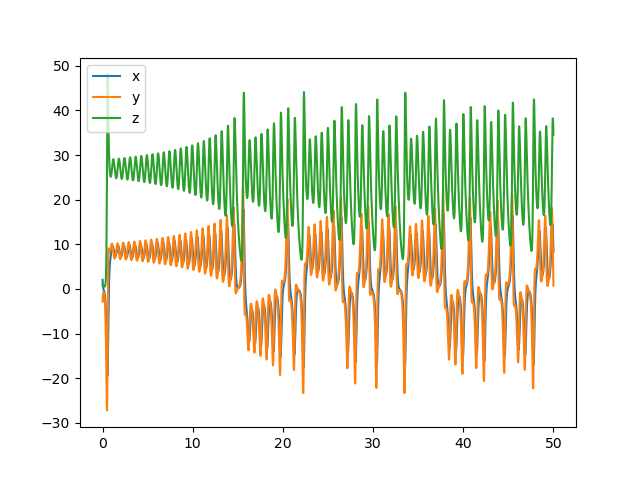

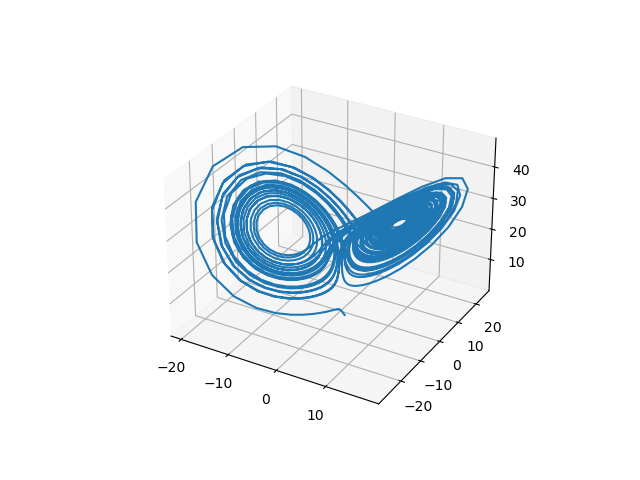

In [3]:
%matplotlib widget

t = np.linspace(0, 50, 2000)

x0 = np.random.uniform(-3, 3, size=(1, 3))[0]
print(x0)

sim_1 = simulate_lorenz(x0, t)

z, dz, ddz = sim_1


fig = plt.figure()
ax = plt.axes(projection='3d')


xdata = z[:,0]
ydata = z[:,1]
zdata = z[:,2]


ax.plot3D(xdata, ydata, zdata)
#fig.show()

fig2 = plt.figure()

plt.plot(t, xdata, label = "x")
plt.plot(t, ydata, label = "y")
plt.plot(t, zdata, label = "z")
plt.legend()
plt.show()
#fig2.show()
#


# Testing generate_thomas_data()

In [6]:
n_ics = 50
noise_strength=0

t = np.arange(0, 500, .2)
t = np.linspace(0, 500, 5000) # to be consistent with the previous test


n_steps = t.size
input_dim = 10

ic_means = np.array([0,0,25])
ic_widths = 2*np.array([36,48,41])

# training data
ics = ic_widths*(np.random.rand(n_ics, 3)-.5) + ic_means
data = generate_thomas_data(ics, t, input_dim, linear=True)


print(data['x'].shape)

(50, 5000, 10)


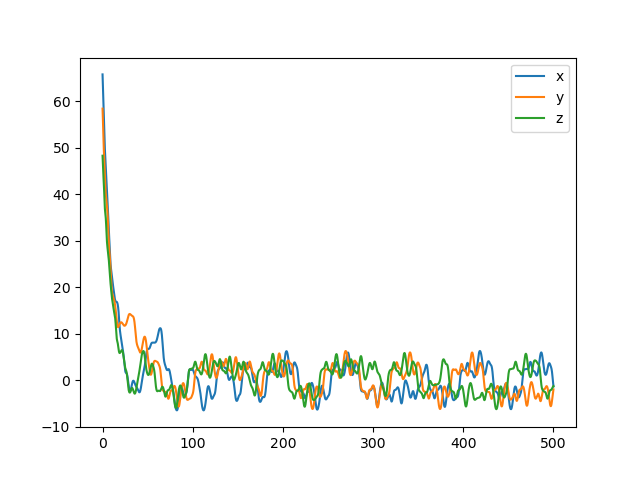

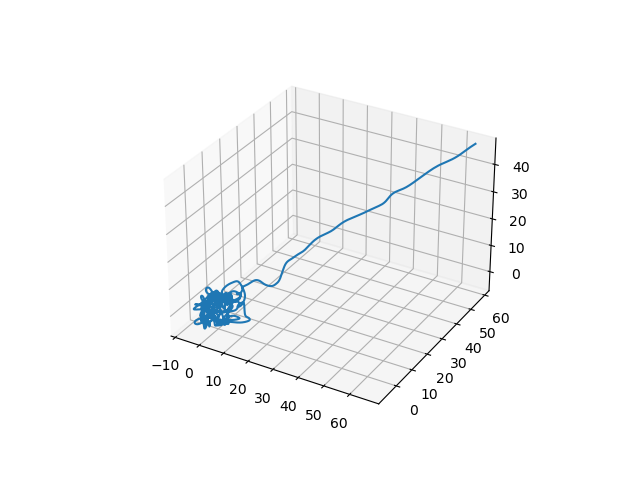

In [7]:
%matplotlib widget


# the second component is the time for sure

xdata = data['x'][1,:,1]
ydata = data['x'][2,:,1]
zdata = data['x'][3,:,1]



plt.plot(t, xdata , label = "x")
plt.plot(t, ydata , label = "y")
plt.plot(t, zdata , label = "z")

plt.legend()
#plt.show()

##### plot 3D


fig = plt.figure()
ax = plt.axes(projection='3d')





ax.plot3D(xdata, ydata, zdata)
#fig.show()


In [8]:
n_ics = 50
noise_strength=0

t = np.arange(0, 50, .02)
t = np.linspace(0, 50, 2000) # to be consistent with the previous test

n_steps = t.size
input_dim = 10

ic_means = np.array([0,0,25])
ic_widths = 2*np.array([36,48,41])

# training data
ics = ic_widths*(np.random.rand(n_ics, 3)-.5) + ic_means
data = generate_lorenz_data(ics, t, input_dim, linear=True)



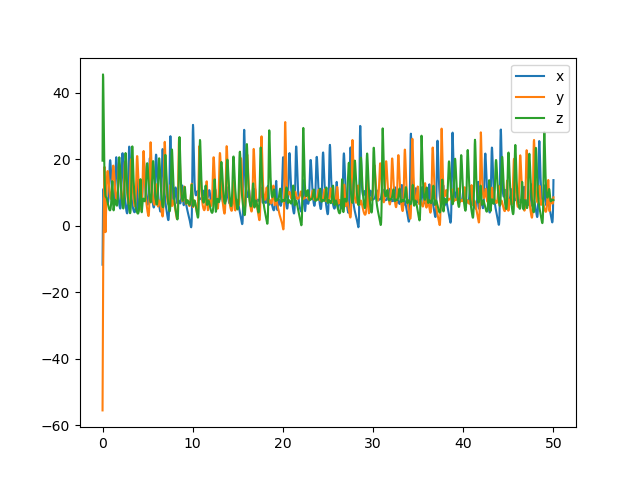

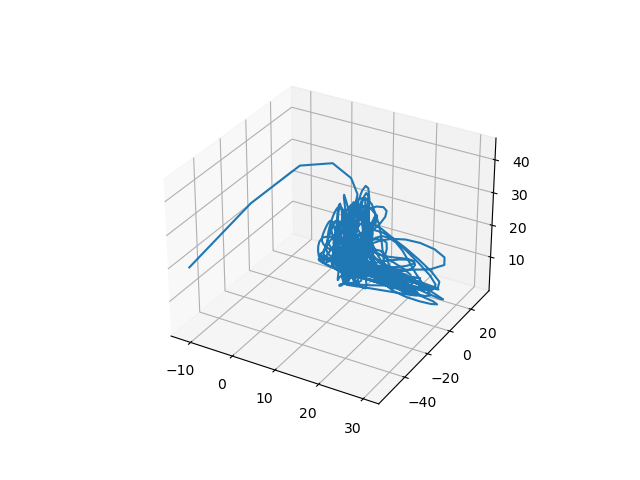

In [9]:
%matplotlib widget

# the second component is the time for sure

xdata = data['x'][1,:,1]
ydata = data['x'][2,:,1]
zdata = data['x'][3,:,1]



plt.plot(t, xdata , label = "x")
plt.plot(t, ydata , label = "y")
plt.plot(t, zdata , label = "z")

plt.legend()
plt.show()

##### plot 3D


fig = plt.figure()
ax = plt.axes(projection='3d')





ax.plot3D(xdata, ydata, zdata)
#fig.show()
